In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.summarystats as ds

from delfi.simulator.BaseSimulator import BaseSimulator

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

from delfi.utils.viz import plot_pdf

from tqdm import tqdm_notebook as tqdm

%matplotlib notebook

In [2]:
class SphereModel(BaseSimulator):
    def __init__(self, sigma, ndim, seed=None):
        super().__init__(dim_param=ndim, seed=seed)
        
        self.sigma = sigma
        
    def gen_single(self, params):
        m = np.linalg.norm(params)
        draw = self.rng.normal(loc=m, scale=self.sigma, size=(1,))
        return { 'data' : draw }
    
class SphericalDistribution(dd.BaseDistribution.BaseDistribution):
    def __init__(self, sm, obs_stats, seed=None):
        super().__init__(sm.dim_param, seed=seed)
        self.sm = sm
        self.obs_stats = obs_stats
        self.m = np.linalg.norm(obs_stats)
        self.sigma = sm.sigma
        
    def eval(self, params, log=True):
        logl = -0.5 * np.log(2 * np.pi * self.sigma) -0.5 * (np.linalg.norm(params, axis=1) - self.m) ** 2 / (self.sigma ** 2)
        return logl if log else np.exp(logl)

In [3]:
seed = 678
ndim = 2
n_components = 8
n_hiddens = n_components * ndim * 5

sigma = 0.2

true_params = 2 * np.eye(ndim)[0]
obs_stats = [np.linalg.norm(true_params)]

n_train = 600
n_rounds = 5

nprocs = 2

In [4]:
dg.BaseGenerator

<module 'delfi.generator.BaseGenerator' from '/Users/kaan/delfi/delfi/generator/BaseGenerator.py'>

In [9]:
ms = [ SphereModel(sigma=sigma, ndim=ndim, seed=seed) for i in range(nprocs) ]
p = dd.Uniform(-2 * np.ones(ndim), 2 * np.ones(ndim), seed=seed)
s = ds.Identity(1)
g = dg.MPGenerator(models=ms, prior=p, summary=s)

gt = SphericalDistribution(ms[0], obs_stats, seed=seed)

print(gt.eval([obs_stats]))

Parent: Starting workers
Parent: Done
[-0.11421958]
Worker: Starting worker
Worker: Starting worker
Worker: Listening
Worker: Listening
Worker: Received data of size 1
Worker: Skipping
Worker: Data: [array([ 0.0875636 ,  0.20046268])]
Worker: Listening
Worker: Sending data
Worker: Done
Worker: Listening
Worker: Received data of size 50
Worker: Received data of size 50
Worker: Data: [array([ 0.80185727,  0.12556015]), array([-0.75081477, -1.73161135]), array([ 1.62364908,  1.50343491]), array([-0.58772628, -0.15968367]), array([ 0.52032637,  0.63707396]), array([-0.84266413, -1.73809671]), array([ 0.26666025, -0.74431237]), array([-1.75565504, -0.15490641]), array([ 1.15098442,  1.44517772]), array([-1.86698173,  1.16822845]), array([ 1.18737858, -0.77540774]), array([-0.65591411, -1.92974853]), array([-0.28592468,  0.10430176]), array([-0.52568586, -0.1249311 ]), array([-0.37467093, -1.79200308]), array([ 0.61348668,  1.62353179]), array([-1.17978507,  0.25725133]), array([-1.73237412,

Worker: Sending data
Worker: Data: [array([-1.85331079, -0.24233343]), array([ 1.35023763, -0.49865197]), array([ 1.28024048, -0.6164657 ]), array([ 0.7655217 ,  1.72910468]), array([ 1.34128038,  0.2514052 ]), array([ 1.7574038 ,  1.26658803]), array([ 0.67419898,  0.36973972]), array([ 1.20414064, -0.83275881]), array([ 0.19465367, -1.00378244]), array([-1.86807888,  0.8361202 ]), array([-0.72483321, -0.76078771]), array([ 0.11719948,  1.8229342 ]), array([ 0.06765432, -1.0557749 ]), array([-0.16072119, -1.74406214]), array([-1.04515461,  1.10454514]), array([-0.86899129,  1.68425918]), array([ 0.10889446,  1.60699801]), array([ 1.57962107, -0.69368119]), array([ 1.58128141, -0.71945814]), array([-0.03542566, -1.19153782]), array([-1.04438495, -0.09786086]), array([ 1.55464984,  1.94153154]), array([-1.39761628,  1.55452111]), array([-1.6547598 , -1.83842511]), array([ 1.34741061, -1.60803067]), array([-0.50809995,  0.48469517]), array([ 0.80702899, -1.30978721]), array([ 1.7422771 ,

Worker: Listening
Worker: Sending data
Worker: Done
Worker: Received data of size 50
Worker: Listening
Worker: Received data of size 50
Worker: Data: [array([ 1.6872294 , -1.76270138]), array([-1.08538347, -0.65860498]), array([-0.51397372, -0.08849007]), array([-1.9954501 ,  0.32156045]), array([ 0.17158172,  1.42262131]), array([ 0.63385843,  1.08738146]), array([ 0.32056164, -1.10939244]), array([-0.51059561,  0.92599688]), array([-1.53354651, -0.70889706]), array([ 1.76450716, -1.09342661]), array([ 0.44800989,  1.57473124]), array([ 0.02299638,  1.02223867]), array([-1.51431003, -1.19385379]), array([ 0.36812036, -1.22566744]), array([-1.3328355 , -1.15477206]), array([-0.42101625, -0.20309276]), array([-0.53036307,  1.04814022]), array([-0.1621093 , -0.19566747]), array([ 0.52351713,  0.28453154]), array([ 0.50938514, -1.71892072]), array([-1.61573941,  1.97570517]), array([-0.00695079,  1.72207158]), array([-0.38946663, -0.71343673]), array([-0.01179291,  0.13465973]), array([ 0

Worker: Sending data
Worker: Done
Worker: Data: [array([-1.73855534, -0.56778555]), array([ 0.99279518,  1.79871064]), array([-1.12210036, -1.38204531]), array([-1.60799206,  0.35239933]), array([-1.65754093,  1.19834995]), array([-1.53771852,  0.87592645]), array([-1.08751911, -1.00160182]), array([ 1.41428139, -1.12184444]), array([-1.88418102, -0.01414374]), array([ 1.95228519,  0.54123387]), array([-0.0856451 ,  1.88971242]), array([ 1.14588033,  1.61927654]), array([ 0.07481037,  1.71366193]), array([ 1.35150034, -1.58014068]), array([-1.37348536, -1.60655932]), array([-1.89348764,  1.53600867]), array([-1.08236658, -1.20817526]), array([ 1.51495803,  1.97419202]), array([-1.85336559,  0.80593534]), array([ 1.38675868,  1.67536795]), array([ 1.27207792, -1.32895698]), array([-0.18473444, -1.0258471 ]), array([ 0.06054242,  1.66204065]), array([ 0.87117306, -1.78045557]), array([ 0.63899685, -1.98901318]), array([ 1.69253171, -0.90748141]), array([ 1.69098714,  1.18801264]), array(

Worker: Sending data
Worker: Listening
Worker: Done
Worker: Received data of size 50
Worker: Listening
Worker: Data: [array([ 1.63861319, -1.9859969 ]), array([ 1.69651223, -1.34048615]), array([-1.74302182, -1.27223876]), array([-1.31497103, -0.67857334]), array([ 1.96300491, -0.90718896]), array([-1.33261511, -1.57883155]), array([-0.03737703, -1.59711167]), array([ 1.16940281,  1.52963112]), array([-0.69976352, -1.26741528]), array([-1.06037743, -1.30134551]), array([ 1.60744688,  0.62882582]), array([ 1.57643873,  0.69497606]), array([ 1.13707738,  1.34677367]), array([ 1.10273131, -1.26366795]), array([ 1.65759597,  1.16134862]), array([ 1.42399944, -1.27153421]), array([-1.58823216,  1.02430528]), array([ 1.440221  , -1.24742821]), array([ 1.46033367, -1.15498402]), array([ 1.42123183, -0.13038833]), array([-0.53888012,  1.70314838]), array([ 1.44317644,  0.63472869]), array([-0.03828867,  1.97869492]), array([-0.65099455, -1.9041186 ]), array([ 1.5313095, -1.1097661]), array([ 1

Worker: Sending data
Worker: Done
Worker: Data: [array([-1.31022784, -1.06675856]), array([-1.93246692,  0.73629587]), array([-0.72501013, -1.94532002]), array([ 1.65551707, -0.84051674]), array([ 1.53245242, -1.21394767]), array([-0.09650945,  1.74443817]), array([ 1.92431589,  0.36268751]), array([ 0.91420483, -1.40953002]), array([-0.07917783,  1.54751211]), array([ 1.81632333,  0.98006842]), array([ 0.71397825, -1.83796025]), array([ 1.85309313, -0.91690429]), array([ 1.74343115, -0.84478669]), array([-1.58853455,  1.47075459]), array([ 1.14006522, -1.55312621]), array([-1.48686913, -1.0936844 ]), array([-1.67651137,  0.6937157 ]), array([ 0.26541781,  1.66687374]), array([-1.21274097,  1.83431353]), array([ 0.04807126,  1.75198531]), array([-0.16860309,  1.81673572]), array([-0.87968003, -1.63184482]), array([-1.01327121,  0.02992096]), array([ 1.19837624,  1.30474019]), array([ 1.69870984,  1.2438786 ]), array([-0.39959217,  1.68850168]), array([-0.89683692, -1.63111244]), array(

Worker: Sending data
Worker: Sending data
Worker: Done
Worker: Done
Worker: Listening
Worker: Listening
Worker: Received data of size 50
Worker: Received data of size 50
Worker: Data: [array([ 1.31595914,  1.22941123]), array([-1.12112253, -0.91485269]), array([ 0.96683335, -1.32248304]), array([-1.30131155,  1.02937714]), array([ 1.50807949,  1.11084656]), array([ 0.02884355,  1.57364267]), array([ 1.81413802,  0.56520094]), array([-1.22597903,  0.9626397 ]), array([ 0.80267772,  1.87503656]), array([-1.28190665, -0.59965226]), array([ 0.59554733, -1.6612723 ]), array([-1.98757443, -1.01591854]), array([ 1.52537969,  1.08907667]), array([-0.8180523 , -1.56867143]), array([-0.42313971,  1.57048399]), array([ 1.58476706, -1.20401331]), array([-1.95444302,  0.84704035]), array([-0.07013314,  1.80414105]), array([ 0.29034728,  1.34754905]), array([-1.62808718, -1.55660099]), array([-0.5878249 , -1.25353703]), array([-1.09026344,  1.42781384]), array([ 1.88712004,  0.85155706]), array([-1.

Worker: Sending data
Worker: Done
Worker: Data: [array([ 0.34549566, -1.92948373]), array([-1.25244283, -1.41883451]), array([ 1.4690527 ,  1.22820714]), array([-1.72403496, -1.1710771 ]), array([-1.00813803, -1.35242895]), array([-0.40039523,  1.51187055]), array([-1.54314758,  1.0484652 ]), array([-1.69096179,  0.46687193]), array([ 1.51597338,  0.07728309]), array([ 1.19645625,  1.49241593]), array([-1.48072612, -1.14488053]), array([-1.8845654 ,  1.37359411]), array([-1.31045416, -1.47260437]), array([ 1.14455957,  1.94859066]), array([ 0.85037615, -1.92222748]), array([ 0.18201073,  0.86922901]), array([-0.94260679,  1.32706453]), array([ 1.63963973,  0.48066257]), array([ 1.76503415,  1.15715029]), array([-1.91708837,  0.63469258]), array([-1.60608041, -0.94188662]), array([ 1.88292903,  0.5283138 ]), array([ 1.94198854, -0.42289083]), array([-1.36200755,  0.72345147]), array([ 1.20622089,  1.78515223]), array([ 1.56524199, -1.54414267]), array([-1.54365874,  0.78099588]), array(

Worker: Sending data
Worker: Sending data
Worker: Done
Worker: Listening
Worker: Done
Worker: Received data of size 50
Worker: Listening
Worker: Received data of size 50
Worker: Data: [array([ 1.02735086,  0.81407705]), array([-1.92643877,  1.55874746]), array([ 0.82780928,  1.93916363]), array([ 1.02972809,  0.95085797]), array([-0.25539739, -1.67652972]), array([-1.12643161,  1.50422351]), array([ 1.98600724,  1.2910373 ]), array([-1.87552876, -0.64523122]), array([ 1.45074212, -1.80475106]), array([ 1.84049758,  0.01551582]), array([ 1.81845782,  1.37504275]), array([ 1.75249325,  1.81371709]), array([ 0.02965586, -1.92077988]), array([ 1.17293074,  1.08896646]), array([ 0.28872217, -1.14996038]), array([-0.78335262, -0.21304924]), array([ 0.38566881, -1.31474112]), array([ 0.45873721,  1.74127476]), array([ 0.8106522 , -1.58908623]), array([ 1.4275647 , -0.06863862]), array([-0.84622781, -1.64005129]), array([-1.79860891, -0.1622992 ]), array([-1.24731924, -1.49454155]), array([-1.

Worker: Sending data
Worker: Data: [array([-0.28960918,  1.49061259]), array([ 1.95082037,  0.2683701 ]), array([ 1.17388588, -0.31606019]), array([-0.41950357, -1.04251527]), array([-0.09397309, -1.29358651]), array([-1.02995495,  0.82306357]), array([-1.06893156, -0.70454167]), array([-1.42049789,  0.46523989]), array([-1.95513772,  1.49667646]), array([ 1.29414369, -1.1029008 ]), array([ 1.14880153,  1.91997321]), array([-0.1064202 , -1.98180516]), array([-1.4665707 , -1.03645261]), array([ 0.62501909,  1.82743967]), array([ 1.86137888,  0.98266556]), array([ 1.16803489,  0.86240147]), array([-1.25385736,  1.16472811]), array([-0.55527098,  1.4363982 ]), array([-1.49679228,  1.02624166]), array([ 1.65522875,  0.37819849]), array([ 1.1649369 ,  1.27247358]), array([-0.49861534,  1.9566207 ]), array([ 0.40722395,  0.86105112]), array([ 0.54813838,  1.39995398]), array([ 0.06319371, -1.86234874]), array([-0.85135435,  1.6117168 ]), array([ 1.42332993, -0.96908054]), array([ -4.14524792

Worker: Listening
Worker: Sending data
Worker: Skipping
Worker: Done
Worker: Listening
Worker: Listening
Worker: Skipping
Worker: Listening
Worker: Received data of size 50
Worker: Received data of size 50
Worker: Data: [array([-1.69044875,  0.55273798]), array([-0.1921593 , -1.25917885]), array([-1.26058573,  1.52935221]), array([ 1.74775543, -0.40217918]), array([-1.7825698 ,  0.68701091]), array([ 1.68986495,  0.10070881]), array([-1.28625946, -1.48229158]), array([ 0.84400072,  1.0983761 ]), array([-0.69169983, -1.0892088 ]), array([ 0.85565604,  1.49020483]), array([-0.76454661, -0.14612874]), array([-0.81507983,  1.45762435]), array([ 0.28051785, -1.71894788]), array([ 0.98442079,  0.95034707]), array([ 0.39442141,  1.61496802]), array([ 0.90424972, -1.40668655]), array([-1.31122852,  1.12386835]), array([-1.62273333, -1.66048426]), array([-1.61487022, -0.80171359]), array([ 0.26834667,  1.5402049 ]), array([-1.12400877,  1.63397519]), array([-0.95052032, -1.01576367]), array([-1

Worker: Received data of size 50
Worker: Sending data
Worker: Data: [array([-1.02904325,  1.60528193]), array([ 0.07032924, -1.32132018]), array([-0.53893652, -1.32235481]), array([-0.39123271,  1.58911216]), array([-0.71794587, -1.67293812]), array([ 0.62665398,  1.23020291]), array([ 0.23774585,  1.66919693]), array([ 1.62585256,  1.10100168]), array([-0.67113141, -1.98467335]), array([ 0.57288007, -1.43497148]), array([ 0.08430474,  1.6964378 ]), array([-0.64847919,  0.37246937]), array([-0.62682818, -1.56539248]), array([-1.83051551,  0.57699695]), array([ 1.8139038 ,  1.45299892]), array([ 0.34034676,  1.59737185]), array([-0.66079703,  1.85433309]), array([ 0.79093567, -1.46342659]), array([ 0.13004554,  1.60456368]), array([-1.68210584,  0.57038862]), array([-0.46339878,  1.8029019 ]), array([-1.22771389,  0.49935246]), array([-1.63588782,  1.9783665 ]), array([-1.35607524,  0.06592822]), array([ 0.64500154,  1.65917788]), array([ 0.00826209,  1.72977151]), array([-0.28285145, -

Worker: Done
Worker: Sending data
Worker: Listening
Worker: Done
Worker: Received data of size 50
Worker: Listening
Worker: Received data of size 50
Worker: Data: [array([ 1.78931264,  0.70596419]), array([-1.49674434, -1.14982643]), array([ 0.9594931 ,  1.86502256]), array([-1.18932123, -0.21408284]), array([ 1.40787809,  0.54098519]), array([-0.69188631, -1.65645789]), array([ 0.20059135,  1.56159783]), array([-0.27987615,  1.93721806]), array([-1.88583749,  1.57006389]), array([-0.44536283, -1.70407194]), array([-1.74547868,  1.89038789]), array([ 1.86479543,  0.97898234]), array([ 0.02440677,  1.47771958]), array([ 1.35889804,  0.00394257]), array([-1.27013868, -0.35213404]), array([-1.31487115,  1.26640687]), array([-0.92870744, -1.77590807]), array([ 0.565665  ,  1.77827176]), array([ 1.76409184,  0.85912288]), array([-1.64229514, -1.30747233]), array([-1.30098398,  0.95436114]), array([ 1.91461786, -1.16866006]), array([-0.94880071,  1.8234998 ]), array([-0.3956098 , -1.41324983

In [10]:
res = infer.SNPE(g, obs=[obs_stats], n_hiddens=[n_hiddens], n_components=n_components, seed=seed, verbose=True)
logs, tds, posteriors = res.run(n_train=n_train, n_rounds = n_rounds, round_cl=3)

Parent: Dispatching to worker (len = 1)
Parent: Done
Parent: Dispatching to worker (len = 0)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done


Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 0)
Parent: Done
Parent: Dispatching to worker (len = 0)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done

Parent: Closing
Parent: Closing pipe
Parent: Closing pipe
Parent: Joining process


Exception ignored in: <bound method MPGenerator.__del__ of <delfi.generator.MPGenerator.MPGenerator object at 0x1088a5eb8>>
Traceback (most recent call last):
  File "/Users/kaan/delfi/delfi/generator/MPGenerator.py", line 200, in __del__
    w.join(timout=1)
TypeError: join() got an unexpected keyword argument 'timout'


Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: D

Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: D

Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: D

Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: D

Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Listening to worker
Parent: Done
Parent: Dispatching to worker (len = 50)
Parent: D

In [7]:
def plot_pdfs_2d(dists, labels = None):
    lims = 2 * np.linalg.norm(obs_stats)
    xlist = np.linspace(-lims, lims, 80)
    ylist = np.linspace(-lims, lims, 80)
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    X, Y = np.meshgrid(xlist, ylist)
    xys = np.asarray((X.ravel(), Y.ravel())).T
    
    for i in range(len(dists)):
        d = dists[i]
        Z = d.eval(xys, log=False).reshape(X.shape)
        if labels:
            ax.plot_surface(X, Y, Z, label=labels[i], 
                            cmap=cm.plasma, rstride=1, cstride=1, linewidth=0, antialiased=False)
        else:
            ax.plot_surface(X, Y, Z, 
                            cmap=cm.plasma, rstride=1, cstride=1, linewidth=0, antialiased=False)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #if labels:
    #    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    ax.set_xlabel("$\\theta_1$")
    ax.set_xlabel("$\\theta_2$")
    ax.set_zlabel("$p(\\theta)$")
    plt.show()
    
    return fig

<IPython.core.display.Javascript object>


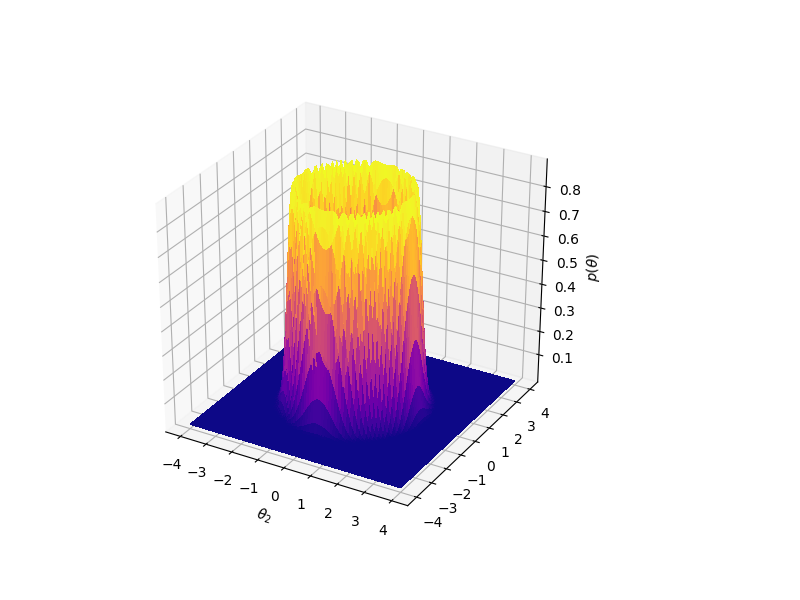

<IPython.core.display.Javascript object>


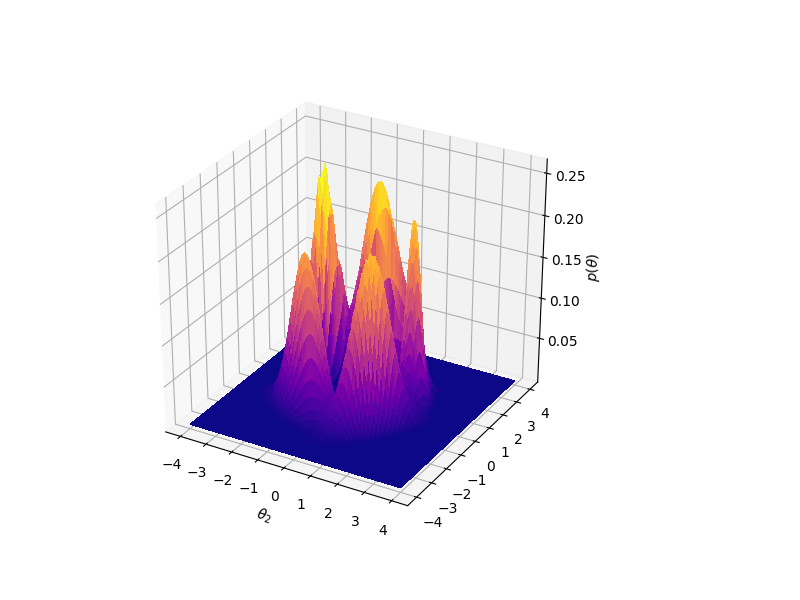

<IPython.core.display.Javascript object>


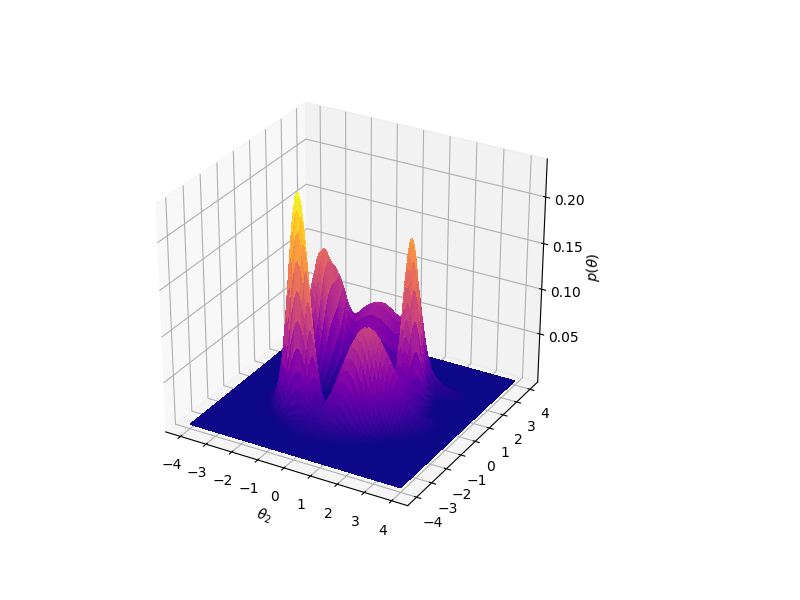

<IPython.core.display.Javascript object>


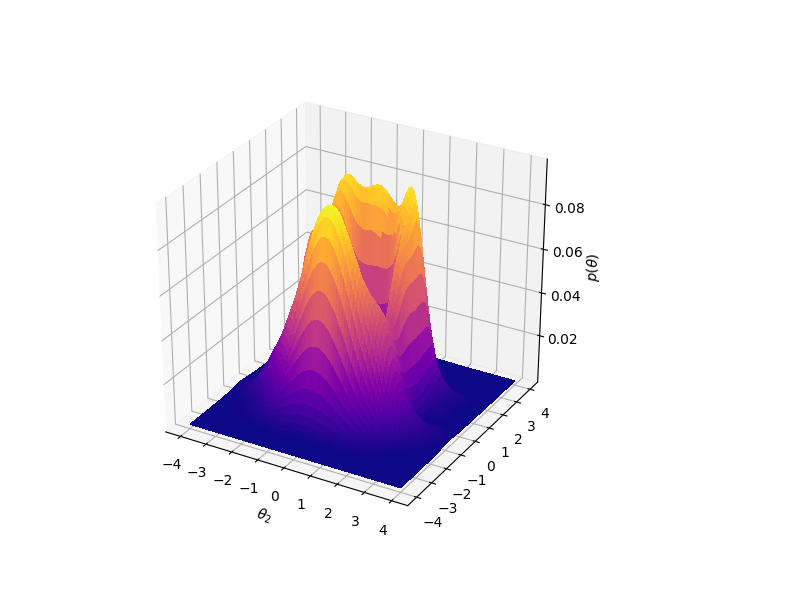

<IPython.core.display.Javascript object>


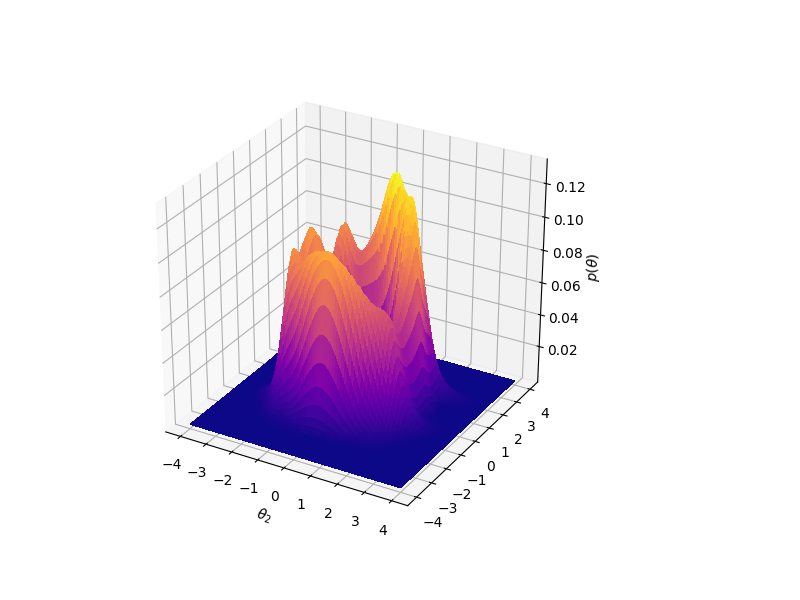

<IPython.core.display.Javascript object>


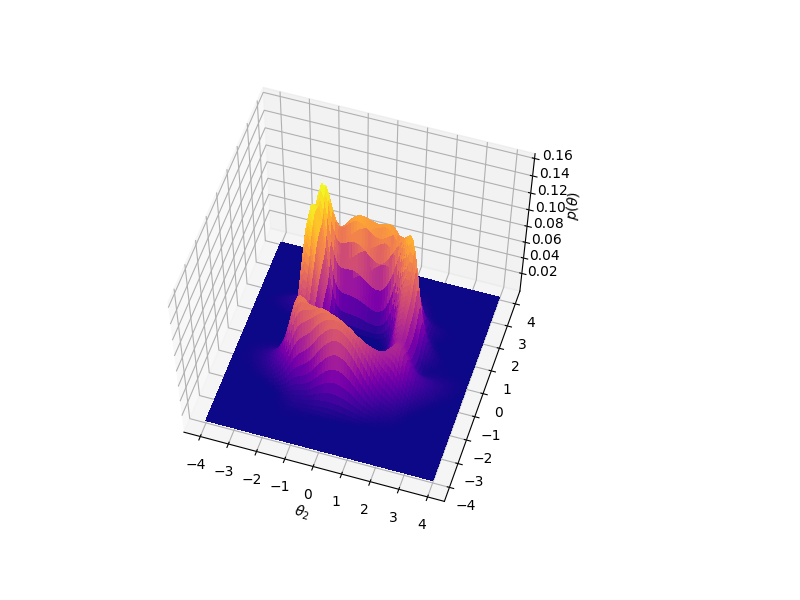

In [8]:
plot_pdfs_2d([gt]);

for p in posteriors:
    plot_pdfs_2d([p]);

In [21]:
def plot_pdfs_1d(dists, labels = None):
    lims = 2
    xlist = np.linspace(-lims, lims, 200)
    
    fig, ax = plt.subplots(1, figsize=(12, 3))
    
    for i in range(len(dists)):
        d = dists[i]
        ylist = d.eval(xlist.reshape((-1,1)), log=False)
        if labels:
            ax.plot(xlist, ylist, label=labels[i])
        else:
            ax.plot(xlist, ylist)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    if labels:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    ax.set_xlabel("$\\theta$")
    ax.set_ylabel("$p(\\theta)$")
    plt.show()
    
    return fig

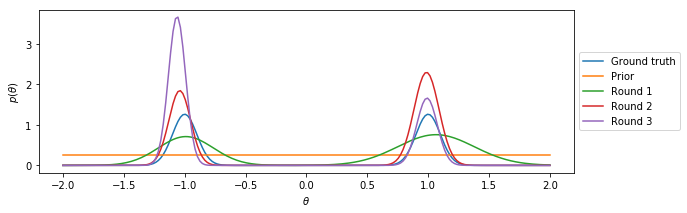

In [149]:
plot_pdfs_1d([gt, p] + posteriors, ["Ground truth", "Prior"] + [ "Round {}".format(i + 1) for i in range(n_rounds) ]);